In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.Tensor(t_c)
t_u = torch.Tensor(t_u)

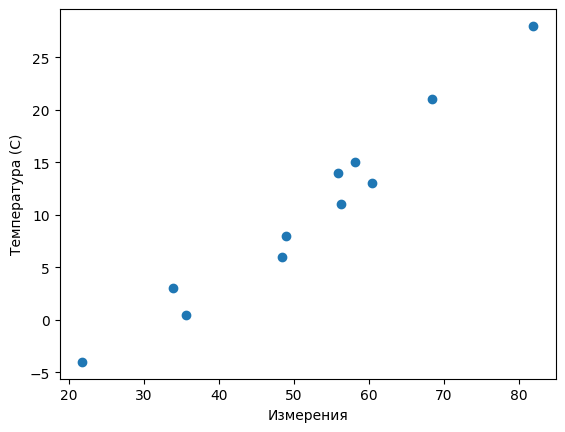

In [3]:
plt.scatter(x=t_u, y=t_c)
plt.xlabel("Измерения")
plt.ylabel('Температура (C)');

# 5.3.1. Возвращаемся от задачи к PyTorch

In [4]:
def model(t_u, w, b):
  return w * t_u + b

def loss_func(t_p, t_c):
  squared_diffs = (t_p - t_c) ** 2
  return squared_diffs.mean()

Мы создаем тут тензор разностей, вычисляя их квадраты поэлементно, и наконец
получаем скалярную функцию потерь, усредняя все элементы итогового тензора. Такая функция потерь называется среднеквадратичной (mean square loss).

Теперь можно задать начальные значения параметров, вызвав модель:

In [5]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)

In [6]:
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

и проверить значение функции потерь:

In [7]:
loss = loss_func(t_p, t_c)
loss

tensor(1763.8848)

In [8]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)

In [9]:
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f" z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


# 5.4.1. Снижение потерь

In [10]:
delta = 0.1
learning_rate = 1e-2

In [11]:
loss_rate_of_change_w = (loss_func(model(t_u, w + delta, b), t_c) - loss_func(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [12]:
loss_rate_of_change_b = (loss_func(model(t_u, w, b + delta), t_c) - loss_func(model(t_u, w, b + delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [13]:
loss_rate_of_change_b

tensor(0.)

# Вычисление производных

In [14]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dw(t_u, w, b):
 return t_u
def dmodel_db(t_u, w, b):
 return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

# 5.4.3. Подгонка модели в цикле

## Цикл обучения

Раз уж мы с этим столкнулись, давайте введем еще несколько терминов. Отдельная итерация обучения, во время которой обновляются параметры для всех
обучающих примеров данных, называется эпохой.

In [15]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_func(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [16]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.Tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c
)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

5.4.4. Нормализация входных сигналов

In [17]:
t_un = 0.1 * t_u

In [18]:
t_un

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [19]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c
)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

И хотя мы вернули скорости обучения значение 1e-2, параметры не растут неограниченно во время обновлений в цикле. Взглянем на градиенты: они одного
порядка, так что для обоих параметров подходит одна величина learning_rate.
Наверное, можно лучше нормализовать данные, чем просто масштабировать
их в десять раз, но, поскольку для наших нужд этого достаточно, остановимся
пока на этом варианте

Выполним цикл в течение количества итераций, достаточного, чтобы увидеть
своими глазами уменьшение изменений params. Изменим количество эпох
до 5000
:

In [20]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c
)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

# 5.4.5. Визуализируем (снова)

Вернемся к тому, что делали в самом начале: построим график наших данных.
Нет, правда, это первое, что стоит сделать при исследовании данных. Всегда
стройте графики данных:

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
t_p = model(t_un, *params)

In [23]:
t_p

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])

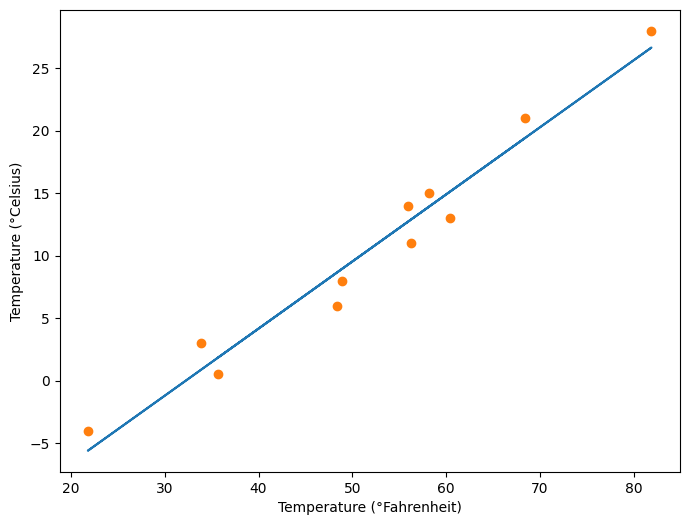

In [24]:
fig = plt.figure(figsize=(8,6))
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o');

В PyTorch, метод detach() используется для отсоединения тензора от вычислительного графа. Когда тензор отсоединен (detached), он перестает отслеживать градиенты и не участвует в автоматическом дифференцировании (обратном распространении градиентов). Это полезно, когда вам нужно работать с тензором, не изменяя его значения, и при этом не сохранять информацию о градиентах.

# 5.5.1. Автоматическое вычисление градиента

In [25]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

Заметили аргумент requires_grad в конструкторе тензора? Он указывает PyTorch
отслеживать целое семейство тензоров, получаемых в результате операций над
params. Другими словами, у любого тензора, произошедшего от params, будет
доступ к цепочке функций, вызывавшихся для получения из params этого
тензора. Если эти функции дифференцируемые (как большинство операций
над тензорами PyTorch), величина производной будет автоматически занесена
в атрибут grad тензора params

Вообще говоря, у всех тензоров PyTorch есть атрибут grad. Обычно он равен None:

In [26]:
params.grad is None

True

In [27]:
loss = loss_func(model(t_u, *params,), t_c)
loss.backward()

In [28]:
params.grad

tensor([4517.2969,   82.6000])

## Накопление функций grad

Количество тензоров с параметром requires_grad, установленным в True аргументом, и композиций функций может быть любым. В этом случае PyTorch
вычисляет производные функции потерь по всей цепочке функций (графу
вычислений) и накапливает их значения в атрибутах grad этих тензоров (узлы
этого графа).
Внимание! Впереди большой подводный камень, о который регулярно спотыкается
множество новичков PyTorch и немало более опытных разработчиков тоже. Мы
написали выше «накапливает», а не «сохраняет».
##Предостережение

При вызове backward производные накапливаются в узлах-листьях. Необходимо
явным образом обнулять градиенты после обновления параметров на их основе.

Повторите вместе с нами: при вызове backward производные накапливаются
в узлах-листьях. Так что, если backward вызывался ранее, потери оцениваются опять, backward вызывается снова (как и в любом цикле обучения), после
чего накапливаются градиенты во всех листьях графа, то есть суммируются с вычисленными на предыдущей итерации, в результате чего получается неправильное значение градиента.
Чтобы предотвратить подобное, необходимо явным образом обнулять градиенты
на каждой итерации. Это легко сделать с помощью метода с заменой на месте
zero_:

In [29]:
if params.grad is not None:
   params.grad.zero_()

In [30]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):

  for epoch in range(1, n_epochs + 1):
      if params.grad is not None:
         params.grad.zero_()

      t_p = model(t_u, *params)
      loss = loss_func(t_p, t_c)
      loss.backward()

      with torch.no_grad():
          params -= learning_rate * params.grad

      if epoch % 500 == 0:
         print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [31]:
training_loop(
    n_epochs = 5000,
    learning_rate= 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

Результат тот же, что и раньше. Отлично! Это значит, что хотя мы можем вычислять производные вручную, нам больше не нужно это делать.

# 5.5.2. Оптимизаторы на выбор

В модуле torch есть подмодуль optim, в котором
можно найти классы, реализующие различные алгоритмы оптимизации. Вот
сокращенный их список

In [32]:
import torch.optim as optim

In [33]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

У каждого оптимизатора доступны два метода: zero_grad и step. zero_grad
обнуляет атрибут grad всех передаваемых оптимизатору параметров при его
создании. step обновляет значения параметров в соответствии с реализуемой
конкретным оптимизатором стратегией оптимизации.

# Оптимизатор на основе градиентного спуска

In [34]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_u, *params)
loss = loss_func(t_p, t_c)
loss.backward()
optimizer.step()

In [35]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_un, *params)
loss = loss_func(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [36]:
params

tensor([1.7761, 0.1064], requires_grad=True)

In [37]:
def training_loop(n_epochs, optimizer, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_func(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [38]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
n_epochs = 5000
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [39]:
training_loop(
    n_epochs=n_epochs,
    optimizer=optimizer,
    t_u = t_un,
    t_c=t_c
)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579277
Epoch 40, Loss 26.498987
Epoch 41,

tensor([  5.3671, -17.3012], requires_grad=True)

# Пробуем другие оптимизаторы

In [40]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
n_epochs = 2000
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs=n_epochs,
    optimizer=optimizer,
    t_u = t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 1334.349121
Epoch 3, Loss 967.816040
Epoch 4, Loss 664.756348
Epoch 5, Loss 424.630066
Epoch 6, Loss 245.539536
Epoch 7, Loss 123.854889
Epoch 8, Loss 53.885220
Epoch 9, Loss 27.729158
Epoch 10, Loss 35.472935
Epoch 11, Loss 65.865608
Epoch 12, Loss 107.448479
Epoch 13, Loss 149.893173
Epoch 14, Loss 185.160629
Epoch 15, Loss 208.152161
Epoch 16, Loss 216.751846
Epoch 17, Loss 211.386734
Epoch 18, Loss 194.333344
Epoch 19, Loss 168.973526
Epoch 20, Loss 139.126602
Epoch 21, Loss 108.508980
Epoch 22, Loss 80.331757
Epoch 23, Loss 57.027798
Epoch 24, Loss 40.099052
Epoch 25, Loss 30.076355
Epoch 26, Loss 26.585768
Epoch 27, Loss 28.510448
Epoch 28, Loss 34.227810
Epoch 29, Loss 41.889488
Epoch 30, Loss 49.703098
Epoch 31, Loss 56.173450
Epoch 32, Loss 60.269638
Epoch 33, Loss 61.500477
Epoch 34, Loss 59.899109
Epoch 35, Loss 55.932751
Epoch 36, Loss 50.363590
Epoch 37, Loss 44.088684
Epoch 38, Loss 37.985180
Epoch 39, Loss 32.781738
Epoch 40, Loss 

tensor([  0.5367, -17.3021], requires_grad=True)

Итак, правило 1: если потери на
обучающем наборе данных не уменьшаются, вероятно, модель слишком проста
для имеющихся данных. Либо наши данные просто не содержат осмысленной
информации, которая позволила бы модели истолковать выходной сигнал: если
милая продавщица в магазине продала нам барометр вместо термометра, у нас
будет мало шансов предсказать по одному атмосферному давлению температуру
в градусах по Цельсию, даже с помощью самой современной архитектуры нейронной сети из Квебека

Итак, правило 2: если потери на обучающем и проверочном
наборах данных расходятся — модель переобучена.

# Разбиение набора данных

In [42]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

Перетасовка элементов тензора эквивалентна перестановке его индексов — как
раз то, что делает функция randperm:

In [60]:
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 *val_t_u

In [56]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_func(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_func(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
    return params

In [61]:
n_epohs = 3000
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=n_epohs,
    params=params,
    optimizer=optimizer,
    train_t_u=train_t_un,
    train_t_c=train_t_c,
    val_t_u=val_t_un,
    val_t_c=val_t_c
)

Epoch 1, Training loss 96.1012, Validation loss 9.5485
Epoch 2, Training loss 35.6511, Validation loss 22.7698
Epoch 3, Training loss 28.4114, Validation loss 35.2234
Epoch 500, Training loss 7.5929, Validation loss 13.7212
Epoch 1000, Training loss 3.9681, Validation loss 6.1071
Epoch 1500, Training loss 3.3146, Validation loss 3.8031
Epoch 2000, Training loss 3.1968, Validation loss 2.9923
Epoch 2500, Training loss 3.1756, Validation loss 2.6782
Epoch 3000, Training loss 3.1717, Validation loss 2.5503


tensor([  5.2345, -16.3226], requires_grad=True)

Еще один любопытный вопрос: раз мы никогда не вызываем backward для val_
loss, зачем вообще формировать граф вычислений? Можно просто вызывать
model и loss_fn как обычные функции, без отслеживания истории вычислений.
Несмотря на всю оптимизацию, построение графа автоматического вычисления
градиентов означает дополнительные затраты ресурсов, особенно когда модель
насчитывает миллионы параметров, которых можно было бы полностью избежать во время прохода проверки.

Для решения этой проблемы PyTorch дает возможность отключать автоматическое вычисление градиентов, когда оно не требуется, с помощью диспетчера
контекста torch.no_grad. На нашей небольшой задаче никаких существенных
преимуществ в смысле скорости или объема потребляемой памяти увидеть не
получится. Однако в моделях покрупнее различия постепенно накапливаются.
Убедиться, что эта возможность работает, можно, посмотрев значение атрибута
requires_grad тензора val_loss:

In [67]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_func(train_t_p, train_t_c)

        with torch.no_grad(): #Диспетчер контекста
             val_t_p = model(val_t_u, *params)
             val_loss = loss_func(val_t_p, val_t_c)
             assert val_loss.requires_grad == False # Убеждается, что для нашего вывода аргументам require_grad принудительно присвоено значение False внутри этого блока

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
    return params

С помощью родственного контекста set_grad_enabled можно задать условное
выполнение кода с включенным или отключенным autograd в соответствии
с булевым выражением, обычно указывающим, работает ли код в режиме обучения или в режиме выполнения вывода. Можно, например, описать функцию
calc_forward, принимающую данные на входе и выполняющую model и loss_fn
с автоматическим вычислением градиентов или без него в соответствии с булевым аргументом train_is:

In [ ]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
         t_p = model(t_u, *params)
         loss = loss_func(t_p, t_c)
    return loss

# 5.7. Упражнение

1. Поменяйте модель на w2 * t_u ** 2 + w1 * t_u + b.

  А. Какие части цикла обучения и не только необходимо поменять, чтобы
  учесть подобное новое определение?

  Б. Какие части безразличны к отключению модуля?

  В. Выше или ниже стал уровень потерь после обучения?
  
  Г. Стал ли фактический результат лучше или хуже?

In [65]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [90]:
n_epohs = 500
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs=n_epohs,
    params=params,
    optimizer=optimizer,
    train_t_u=train_t_un,
    train_t_c=train_t_c,
    val_t_u=val_t_un,
    val_t_c=val_t_c
)

Epoch 1, Training loss 750.0999, Validation loss 341.4193
Epoch 2, Training loss 535.5286, Validation loss 257.9812
Epoch 3, Training loss 358.7345, Validation loss 186.9478
Epoch 500, Training loss 3.0539, Validation loss 1.7213


tensor([-0.0512,  0.5064, -3.9174], requires_grad=True)